In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.drop('PassengerId',inplace=True,axis=1)
df.drop('Name',inplace=True,axis=1)
df.drop('Ticket',inplace=True,axis=1)
df.drop('Cabin',inplace=True,axis=1)
df["Age"]=df["Age"].fillna(df["Age"].median())

In [ ]:
# One-hot encode the 'Status' column
df = pd.get_dummies(df, columns=['Sex'], prefix='Sex')
# One-hot encode the 'Status' column
df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked')

print(df)

     Survived  Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  \
0           0       3  22.0      1      0   7.2500       False      True   
1           1       1  38.0      1      0  71.2833        True     False   
2           1       3  26.0      0      0   7.9250        True     False   
3           1       1  35.0      1      0  53.1000        True     False   
4           0       3  35.0      0      0   8.0500       False      True   
..        ...     ...   ...    ...    ...      ...         ...       ...   
886         0       2  27.0      0      0  13.0000       False      True   
887         1       1  19.0      0      0  30.0000        True     False   
888         0       3  28.0      1      2  23.4500        True     False   
889         1       1  26.0      0      0  30.0000       False      True   
890         0       3  32.0      0      0   7.7500       False      True   

     Embarked_C  Embarked_Q  Embarked_S  
0         False       False        True  
1  

In [ ]:
la = LabelEncoder()
df['Sex_female']= la.fit_transform(df['Sex_female'])
df['Sex_male']= la.fit_transform(df['Sex_male'])
df['Embarked_C']= la.fit_transform(df['Embarked_C'])
df['Embarked_Q']= la.fit_transform(df['Embarked_Q'])
df['Embarked_S']= la.fit_transform(df['Embarked_S'])
print (df)

     Survived  Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  \
0           0       3  22.0      1      0   7.2500           0         1   
1           1       1  38.0      1      0  71.2833           1         0   
2           1       3  26.0      0      0   7.9250           1         0   
3           1       1  35.0      1      0  53.1000           1         0   
4           0       3  35.0      0      0   8.0500           0         1   
..        ...     ...   ...    ...    ...      ...         ...       ...   
886         0       2  27.0      0      0  13.0000           0         1   
887         1       1  19.0      0      0  30.0000           1         0   
888         0       3  28.0      1      2  23.4500           1         0   
889         1       1  26.0      0      0  30.0000           0         1   
890         0       3  32.0      0      0   7.7500           0         1   

     Embarked_C  Embarked_Q  Embarked_S  
0             0           0           1  
1  

In [ ]:
y = df['Survived']
df.drop('Survived',inplace=True,axis=1)
x = df


print(x)


     Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  Embarked_C  \
0         3  22.0      1      0   7.2500           0         1           0   
1         1  38.0      1      0  71.2833           1         0           1   
2         3  26.0      0      0   7.9250           1         0           0   
3         1  35.0      1      0  53.1000           1         0           0   
4         3  35.0      0      0   8.0500           0         1           0   
..      ...   ...    ...    ...      ...         ...       ...         ...   
886       2  27.0      0      0  13.0000           0         1           0   
887       1  19.0      0      0  30.0000           1         0           0   
888       3  28.0      1      2  23.4500           1         0           0   
889       1  26.0      0      0  30.0000           0         1           1   
890       3  32.0      0      0   7.7500           0         1           0   

     Embarked_Q  Embarked_S  
0             0           1  
1  

In [ ]:
print(y)
print(x)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64
     Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  Embarked_C  \
0         3  22.0      1      0   7.2500           0         1           0   
1         1  38.0      1      0  71.2833           1         0           1   
2         3  26.0      0      0   7.9250           1         0           0   
3         1  35.0      1      0  53.1000           1         0           0   
4         3  35.0      0      0   8.0500           0         1           0   
..      ...   ...    ...    ...      ...         ...       ...         ...   
886       2  27.0      0      0  13.0000           0         1           0   
887       1  19.0      0      0  30.0000           1         0           0   
888       3  28.0      1      2  23.4500           1         0           0   
889       1  26.0      0      0  30.0000           0         1           1   
8

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x.values, y.values, test_size = 0.2, random_state=42) #split the  data into traing and validating

In [ ]:
# Initialize model with k = 3
knn = KNeighborsClassifier(n_neighbors=3)
# Train the model
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test)

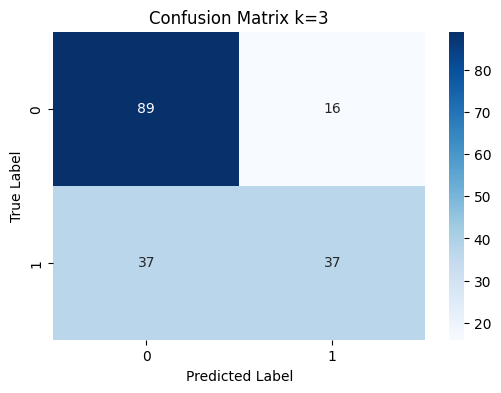


Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.85      0.77       105
           1       0.70      0.50      0.58        74

    accuracy                           0.70       179
   macro avg       0.70      0.67      0.68       179
weighted avg       0.70      0.70      0.69       179



In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix k=3')
plt.show()

# Classification Report
cr = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(cr)

In [ ]:
# Initialize model with k = 5
knn = KNeighborsClassifier(n_neighbors=5)
# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)

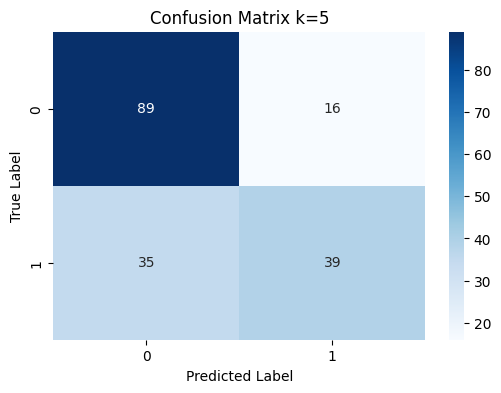


Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.85      0.78       105
           1       0.71      0.53      0.60        74

    accuracy                           0.72       179
   macro avg       0.71      0.69      0.69       179
weighted avg       0.71      0.72      0.71       179



In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix k=5')
plt.show()

# Classification Report
cr = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(cr)

In [ ]:
# Initialize model with k = 7
knn = KNeighborsClassifier(n_neighbors=7)
# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred = knn.predict(X_test)

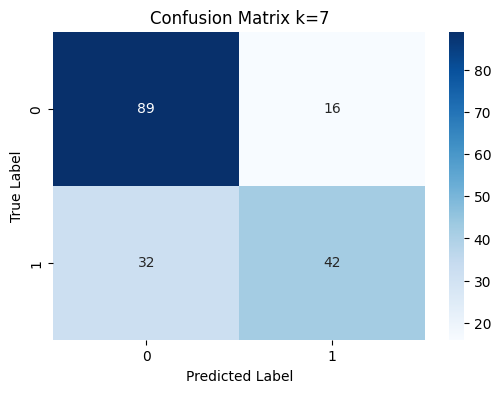


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       105
           1       0.72      0.57      0.64        74

    accuracy                           0.73       179
   macro avg       0.73      0.71      0.71       179
weighted avg       0.73      0.73      0.73       179



In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix k=7')
plt.show()

# Classification Report
cr = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(cr)
with open("knn_k=7_model.pkl", "wb") as f:
    pickle.dump(knn, f) #model name is knn here